In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

# Load the SSD MobileNet V2 model from TF Hub

In [2]:
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# COCO label map (first 91 labels)

In [4]:
# COCO label map (first 91 labels, index 0 is reserved for background)
labels = [
    "background", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep",
    "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich",
    "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed",
    "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
    "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Load and preprocess the input image

In [8]:
# image_url = "https://upload.wikimedia.org/wikipedia/commons/5/56/Ramphastos_toco_-Brazil-8.jpg"
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQP8mOimgskgWYexU4-CY8oAOKPdtbw_R4KZWBxiGSoQgaw9L13h4rL-sdWsmYOXE6KXHFbq5Y5zCrbymw19oDMcA"
image_path = tf.keras.utils.get_file("toucan.jpg", origin=image_url)

img_raw = tf.io.read_file(image_path)                          # Read image file
img = tf.image.decode_jpeg(img_raw, channels=3)                # Decode JPEG
img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]  # Normalize and add batch dim

23882/23882 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


# Run object detection

In [10]:
img_uint8 = tf.image.convert_image_dtype(img, dtype=tf.uint8)  # Convert to uint8
result = detector(img_uint8)
result = {key: value.numpy() for key, value in result.items()} # Convert tensors to numpy arrays

# Plot the image and draw bounding boxes

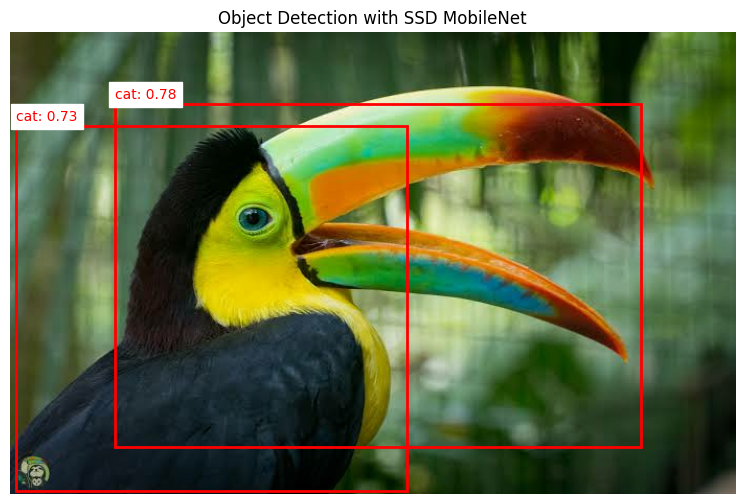

In [ ]:
image_np = img[0].numpy()
plt.figure(figsize=(10, 6))
plt.imshow(image_np)
ax = plt.gca()
num_detections = int(result["num_detections"][0])

# Draw bounding boxes and labels
for i in range(num_detections):
    score = result["detection_scores"][0][i]
    if score < 0.5:
        continue
    box = result["detection_boxes"][0][i]
    class_id = int(result["detection_classes"][0][i])
    label = labels[class_id]

    # Unpack box coordinates and scale to image size
    ymin, xmin, ymax, xmax = box
    h, w, _ = image_np.shape
    (left, right, top, bottom) = (xmin * w, xmax * w, ymin * h, ymax * h)

    # Draw box
    ax.add_patch(plt.Rectangle((left, top), right - left, bottom - top,
                               edgecolor='red', facecolor='none', linewidth=2))
    ax.text(left, top - 5, f"{label}: {score:.2f}", color='red', fontsize=10, backgroundcolor='white')

plt.axis('off')
plt.title("Object Detection with SSD MobileNet")
plt.show()